In [ ]:
import json
from collections import Counter
# from src.module.func import scatter_plot, plot_points

# 在 Jupyter 中交互式输入文件路径
file_path = "/root/ftg/results/tokencls_agnews_on_imdb.json"
j2 = "/root/ftg/results/tokencls_agnews.json"
# j1 = input("请输入第一个 JSONL 文件的路径: ")
# j2 = input("请输入第二个 JSONL 文件的路径: ")
import matplotlib.pyplot as plt

plt.rcParams["figure.figsize"] = [12, 8]
plt.rcParams["figure.dpi"] = 200

def extract_coordinates(jsonl_file):
    """Extract coordinates from a JSONL file."""
    data = []
    with open(jsonl_file, "r", encoding="utf-8") as f:
        result = json.load(f)
        for line in result:
            data.append(line[0])  # Parse each JSON line

    # Extract coordinates
    coordinates = []
    for entry in data:
        coordinates.extend([(item[0], item[1]) for item in entry["ig_gold"]])
    return coordinates


def filter_counter(counter_obj):
    # 计算平均值
    mean_value = int(sum(counter_obj.values()) / len(counter_obj))
    threshold = int(mean_value * 0)
    # threshold = int(mean_value * 0.1)
    # 过滤元素
    filtered_counter = {
        key: value for key, value in counter_obj.items() if value >= threshold
    }

    return filtered_counter


import matplotlib.pyplot as plt


def scatter_plot(counter_obj, highlight_duplicates=None):
    x = [key[0] for key in counter_obj.keys()]
    y = [key[1] for key in counter_obj.keys()]
    sizes = [value * 0.1 for value in counter_obj.values()]  # 调整点大小以反映计数

    plt.scatter(
        x, y, s=sizes, alpha=0.6, color="skyblue", edgecolor="black", label="All Points"
    )

    # Highlight duplicate points if provided
    if highlight_duplicates:
        dup_x = [key[0] for key in highlight_duplicates]
        dup_y = [key[1] for key in highlight_duplicates]
        plt.scatter(dup_x, dup_y, s=1, alpha=0.9, color="red", label="Duplicates")

    plt.xlabel("X values")
    plt.ylabel("Y values")
    plt.title("Scatter plot of (x, y) counts")
    plt.legend()
    plt.show()


# Extract coordinates from both files
coordinates_file1 = extract_coordinates(file_path)
coordinates_file2 = extract_coordinates(j2)

# Count occurrences in both files
counter_file1 = Counter(coordinates_file1)
counter_file2 = Counter(coordinates_file2)
# counter_file1 = filter_counter(counter_file1)
counter_file2 = filter_counter(counter_file2)
scatter_plot(counter_file1)
scatter_plot(counter_file2)

# Find duplicates between the two files
total_coordinates_combined = set(counter_file1) | set(counter_file2)
duplicate_coordinates = set(counter_file1) & set(counter_file2)
complement_1 = set(counter_file1) - set(counter_file2)
complement_coord = set(counter_file2) - set(counter_file1)

duplicate_count = len(duplicate_coordinates)

total_coordinates_file1 = len(set(counter_file1))
total_coordinates_file2 = len(set(counter_file2))
total_coordinates_combined = len(total_coordinates_combined)
total_complement_1 = len(complement_1)
total_complement_2 = len(complement_coord)

# Calculate duplicate ratios
duplicate_ratio_file1 = (
    duplicate_count / total_coordinates_file1 if total_coordinates_file1 > 0 else 0
)
duplicate_ratio_file2 = (
    duplicate_count / total_coordinates_file2 if total_coordinates_file2 > 0 else 0
)
duplicate_ratio_combined = (
    duplicate_count / total_coordinates_combined
    if total_coordinates_combined > 0
    else 0
)
# 绘制带有重复点标记的散点图

scatter_plot(counter_file1, highlight_duplicates=duplicate_coordinates)
scatter_plot(counter_file2, highlight_duplicates=duplicate_coordinates)
scatter_plot(counter_file1, highlight_duplicates=complement_1)
scatter_plot(counter_file2, highlight_duplicates=complement_coord)
# 将集合转换为列表，因为 JSON 不支持集合
complement_1_list = list(complement_1)
complement_2_list = list(complement_coord)

# 写入 JSON 文件
with open("complement_1.json", "w", encoding="utf-8") as f:
    json.dump(complement_1_list, f, ensure_ascii=False, indent=4)
# 写入 JSON 文件
with open("complement_2.json", "w", encoding="utf-8") as f:
    json.dump(complement_2_list, f, ensure_ascii=False, indent=4)

print("写入完成！")

# Print results
print(f"Total coordinates in file 1: {total_coordinates_file1}")
print(f"Total coordinates in file 2: {total_coordinates_file2}")
print(f"Duplicate coordinates between files: {duplicate_count}")
print(f"Difference coordinates_1: {total_complement_1}")
print(f"Difference coordinates_2: {total_complement_2}")
print(f"Ratio of duplicates (file 1): {duplicate_ratio_file1:.2%}")
print(f"Ratio of duplicates (file 2): {duplicate_ratio_file2:.2%}")
print(f"Ratio of duplicates (combined): {duplicate_ratio_combined:.2%}")

坐标总数: 21504
去重高贡献坐标总数: 1035
非高贡献坐标总数: 20469


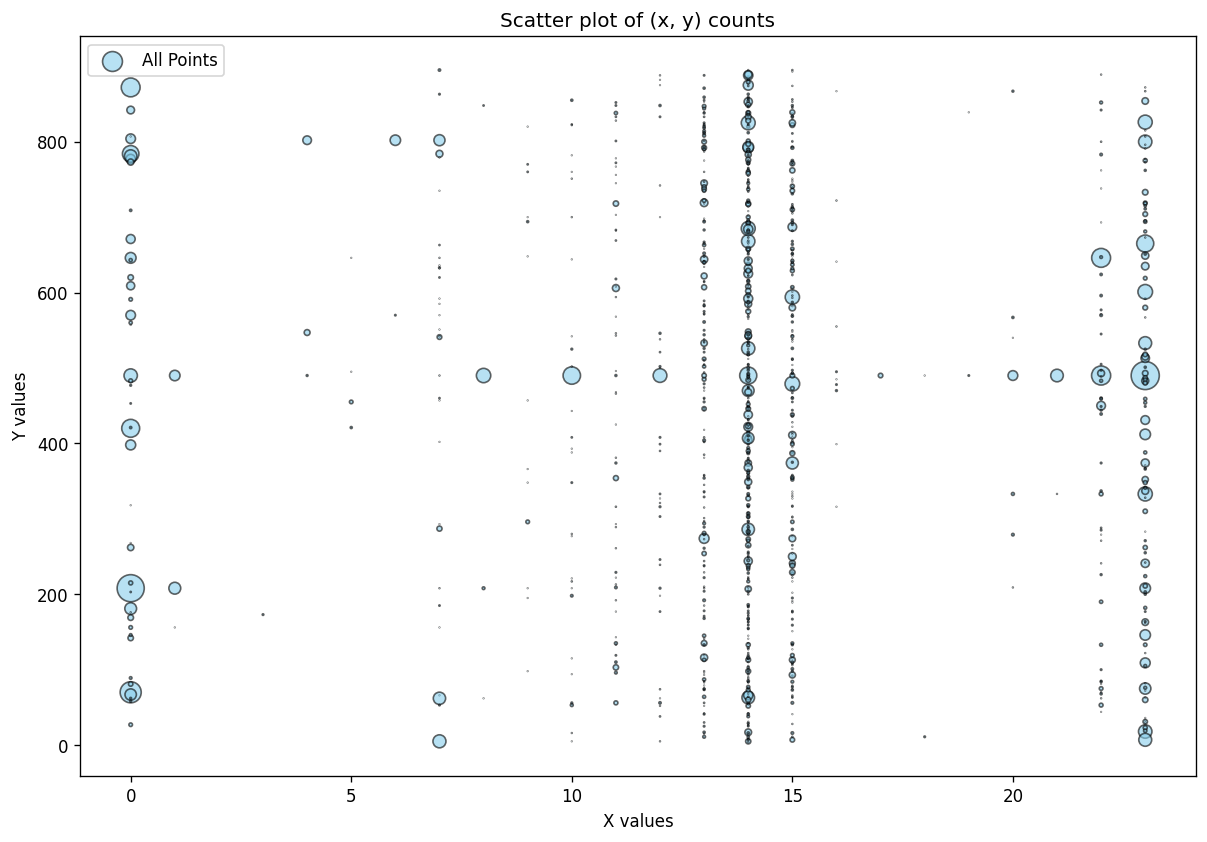

In [40]:
import json
from collections import Counter
import random
import jsonlines

# 读取 JSONL 文件
file_path = "/workspace/ftg/target_neurons/lm_mmlu.json"

# with jsonlines.open(file_path, mode="r") as reader:
#     for obj in reader:
#         print(obj)  # 每个 obj 是一个字典

random.seed(42)
# from src.module.func import scatter_plot, plot_points

# 在 Jupyter 中交互式输入文件路径

save_dir = "./target_neurons"
# j1 = input("请输入第一个 JSONL 文件的路径: ")
# j2 = input("请输入第二个 JSONL 文件的路径: ")
import matplotlib.pyplot as plt

plt.rcParams["figure.figsize"] = [12, 8]
plt.rcParams["figure.dpi"] = 120
full_coord = set((x, y) for x in range(0, 24) for y in range(0, 896))
print(f"坐标总数: {len(full_coord)}")

def extract_coordinates(jsonl_file):
    """Extract coordinates from a JSONL file."""
    data = []
    with jsonlines.open(jsonl_file, mode="r") as reader:
        for line in reader:
            data.append(line)  # Parse each JSON line

    # Extract coordinates
    coordinates = []
    for entry in data:
        coordinates.extend([(item[0], item[1]) for item in entry["mvp"]])
    return coordinates


def filter_counter(counter_obj):
    # 计算平均值
    mean_value = int(sum(counter_obj.values()) / len(counter_obj))
    threshold = int(mean_value * 1)
    # threshold = int(mean_value * 0.1)
    # 过滤元素
    filtered_counter = {
        key: value for key, value in counter_obj.items() if value >= threshold
    }

    return filtered_counter


def scatter_plot(counter_obj, highlight_duplicates=None):
    x = [key[0] for key in counter_obj.keys()]
    y = [key[1] for key in counter_obj.keys()]
    sizes = [value * 0.1 for value in counter_obj.values()]  # 调整点大小以反映计数

    plt.scatter(
        x, y, s=sizes, alpha=0.6, color="skyblue", edgecolor="black", label="All Points"
    )

    # Highlight duplicate points if provided
    if highlight_duplicates:
        dup_x = [key[0] for key in highlight_duplicates]
        dup_y = [key[1] for key in highlight_duplicates]
        plt.scatter(dup_x, dup_y, s=1, alpha=0.9, color="red", label="Duplicates")

    plt.xlabel("X values")
    plt.ylabel("Y values")
    plt.title("Scatter plot of (x, y) counts")
    plt.legend()
    plt.show()


# Extract coordinates from both files
coordinates_file1 = extract_coordinates(file_path)
unique_coord = set(coordinates_file1)
# Count occurrences in both files
all_coord_counter = Counter(coordinates_file1)
# 获取Counter中的所有键

print(f"去重高贡献坐标总数: {len(unique_coord)}")

# counter_file1 = filter_counter(counter_file1)
# print(len(counter_file1))
complement_coord = full_coord - unique_coord
keys = list(complement_coord)

# # 计算要抽取的元素数量，10%的元素
# RATIO = 10
# sample_size = max(1, int(len(keys) // RATIO))

# # 随机抽取10%的元素
# sampled_keys = random.sample(keys, sample_size)
print(f"非高贡献坐标总数: {len(complement_coord)}")
# print(len(sampled_keys))

# 24* 4864 = 116736
# counter_file2 = filter_counter(counter_file2)
scatter_plot(all_coord_counter)
# scatter_plot(Counter(sampled_keys))
counter_file1_list = list(all_coord_counter)
with open(f"{save_dir}/complement_1.json", "w", encoding="utf-8") as f:
    json.dump(counter_file1_list, f, ensure_ascii=False, indent=4)
# with open(f"{save_dir}/random_RATIO{RATIO}.json", "w", encoding="utf-8") as f:
#     json.dump(sampled_keys, f, ensure_ascii=False, indent=4)

In [ ]:
import json
import random

num_layer = 24
num_neuron = 10

# 生成包含随机整数的列表
random_data = [random.sample(range(896), num_neuron) for _ in range(num_layer)]

# 将数据写入 JSON 文件
with open("random_neurons.json", "w", encoding="utf-8") as f:
    json.dump(random_data, f, ensure_ascii=False, indent=4)

print("JSON 文件已生成！")

In [10]:
import json
import ast

new_ig_dict = {}

with open("/workspace/ftg/target_neurons/lm_mmlu.json", encoding="utf-8") as f:
    ig_dict = json.load(f)
for key, value in ig_dict.items():
    new_ig_dict[ast.literal_eval(key)] = value
new_ig_dict = dict(sorted(new_ig_dict.items(), key=lambda item: item[1]))
total_elements = len(new_ig_dict)
top_10_percent = int(total_elements * 0.1)
top_10_percent_dict = dict(list(new_ig_dict.items())[:top_10_percent])

print(top_10_percent_dict)


{(0, 26): 1, (0, 33): 1, (0, 41): 1, (0, 56): 1, (0, 71): 1, (0, 91): 1, (0, 101): 1, (0, 119): 1, (0, 125): 1, (0, 126): 1, (0, 130): 1, (0, 144): 1, (0, 177): 1, (0, 184): 1, (0, 187): 1, (0, 209): 1, (0, 231): 1, (0, 240): 1, (0, 243): 1, (0, 252): 1, (0, 256): 1, (0, 277): 1, (0, 293): 1, (0, 296): 1, (0, 345): 1, (0, 370): 1, (0, 394): 1, (0, 403): 1, (0, 440): 1, (0, 443): 1, (0, 456): 1, (0, 496): 1, (0, 517): 1, (0, 518): 1, (0, 524): 1, (0, 539): 1, (0, 540): 1, (0, 549): 1, (0, 565): 1, (0, 601): 1, (0, 611): 1, (0, 615): 1, (0, 634): 1, (0, 635): 1, (0, 639): 1, (0, 655): 1, (0, 672): 1, (0, 676): 1, (0, 677): 1, (0, 700): 1, (0, 711): 1, (0, 725): 1, (0, 730): 1, (0, 742): 1, (0, 750): 1, (0, 759): 1, (0, 793): 1, (0, 834): 1, (0, 841): 1, (0, 846): 1, (0, 848): 1, (0, 851): 1, (0, 868): 1, (0, 882): 1, (0, 889): 1, (1, 0): 1, (1, 15): 1, (1, 20): 1, (1, 40): 1, (1, 61): 1, (1, 64): 1, (1, 65): 1, (1, 66): 1, (1, 69): 1, (1, 74): 1, (1, 84): 1, (1, 98): 1, (1, 100): 1, (1, 

In [ ]:
import json

def merge_and_sum_dicts(file1, file2):
    # 读取第一个 JSON 文件
    with open(file1, 'r') as f1:
        dict1 = json.load(f1)
    
    # 读取第二个 JSON 文件
    with open(file2, 'r') as f2:
        dict2 = json.load(f2)
    
    # 创建一个新的字典来存储相加后的值
    result = {}
    
    # 遍历第一个字典的键
    for key in dict1:
        if key in dict2:
            # 如果键在两个字典中都存在，将值相加
            result[key] = dict1[key] + dict2[key]
        else:
            # 如果键只在第一个字典中存在，直接添加到结果中
            result[key] = dict1[key]
    
    # 遍历第二个字典的键，处理只在第二个字典中存在的键
    for key in dict2:
        if key not in dict1:
            result[key] = dict2[key]
    
    return result

# 示例用法
file1 = 'data1.json'
file2 = 'data2.json'
result_dict = merge_and_sum_dicts(file1, file2)
print(result_dict)